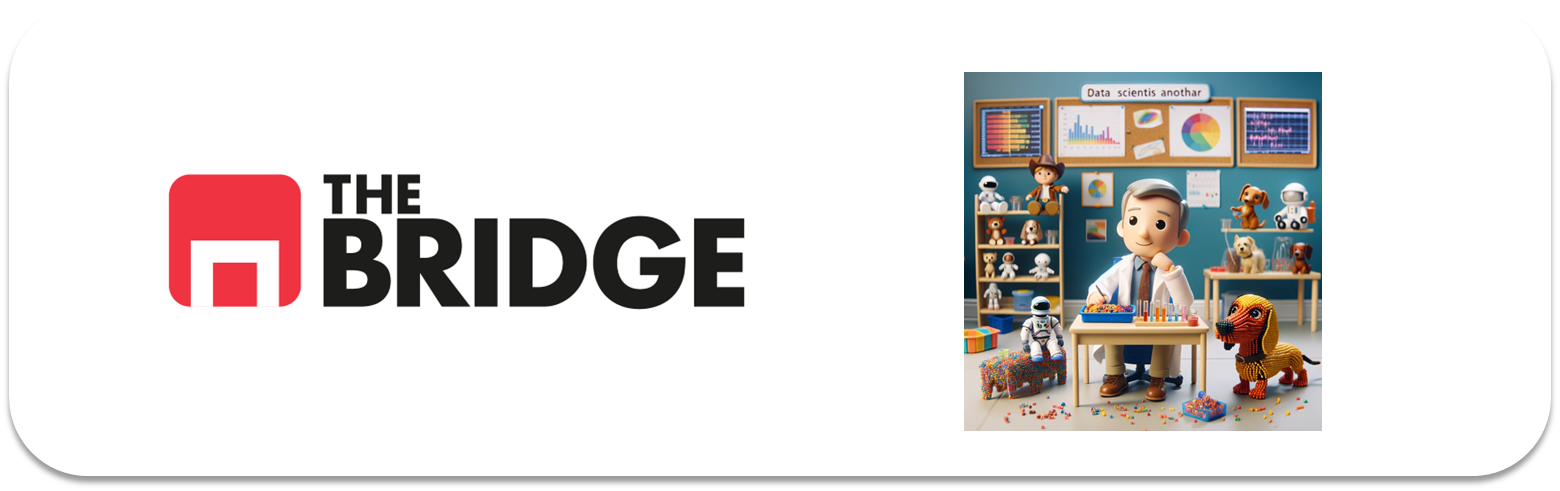

## PRACTICA OBLIGATORIA: **Análisis Univariante**

* La práctica obligatoria de esta unidad consiste en hacer el análisis univariante completo de un dataset con el que acabarás muy familiarizado, el manifiesto de pasajeros del Titanic. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook. Te dejo una que vas a necesitar sí o sí

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from bootcampviztools import *

### #1 Preparación


In [69]:
#Antes de nada, seguiré en la medida de lo posible lo descrito en el resumen univariante del workout:

### Pasos a seguir
0. **Establecer objetivos** 
1. **Completar la definición de los datos/Rellenar fichas datasets**
2. **Tipificar los datos**
3. **Priorizar variables** 
4. **Aplicar tendencia central a todas las variables**
5. **Analizar las frecuencias de las variables categóricas**: Gráficos de barras 
6. **Analizar las medidas de posición y los rangos de las variables numéricas**: Graficos de Caja
7. **Analizar las medidas de dispersión de las variables numéricas**
8. **Analizar las distribuciones de las variables numéricas**: Histogramas y funciones estimadas de densidad (combinados)
9. **Analizar las anomalías o outliers**: confrontación de histogramas y gráficos de cajas. Umbrales (2-3 desviaciones estándar, 4.5 en tamaño "bigotes")

### #1.1


Carga en un dataframe los datos del titanic a partir de un dataset de seaborn. Para ello:

* ejecuta ```python sns.get_dataset_names()```
* localiza el nombre que puede ser el adecuado para el ejercicio
* Asigna la salida de ```sns.load_dataset(<nombre_del_dataset>)``` a una variable "df_titanic"

In [70]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [71]:
dataframe_titanic = sns.load_dataset("titanic")
df_titanic = dataframe_titanic.copy()

In [72]:
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### #1.2

Muestra una porción del dataset ("df_titanic") y su info general. ¿Hay nulos?

In [73]:
df_titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [74]:
df_titanic.info() #si, hay nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [75]:
df_nulos = df_titanic.loc[:,df_titanic.isna().sum()>0]
df_nulos #es la porción del dataframe con nulos

,age,embarked,deck,embark_town
0,22.0,S,NaN,Southampton
1,38.0,C,C,Cherbourg
2,26.0,S,NaN,Southampton
3,35.0,S,C,Southampton
4,35.0,S,NaN,Southampton
...,...,...,...,...
886,27.0,S,NaN,Southampton
887,19.0,S,B,Southampton
888,NaN,S,NaN,Southampton
889,26.0,C,C,Cherbourg


### #1.3

Obtén el porcentaje de nulos y decide que hacer con las columnas con nulos y ejecútalo. Además deshazte de la columna "parch" que no la emplearemos.

In [76]:
# Porcentaje de nulos:

In [77]:
df_nulos.isna().sum()/len(df_nulos)*100

age            19.865320
embarked        0.224467
deck           77.216611
embark_town     0.224467
dtype: float64

In [78]:
df_titanic.isna().sum()/len(df_titanic)*100 #lo compruebo también en el df_titanic por si me he dejado algo

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [79]:
df_nulos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          714 non-null    float64 
 1   embarked     889 non-null    object  
 2   deck         203 non-null    category
 3   embark_town  889 non-null    object  
dtypes: category(1), float64(1), object(2)
memory usage: 22.2+ KB


In [80]:
# Columna parch:

In [81]:
df_titanic.drop(columns=["parch"],inplace=True)

In [82]:
df_titanic

,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [83]:
#En este dataset, no sé si reemplazar los nulos sería lo más adecuado, creo que falta información,
#y no me gustaría que se sesgara imponiendo una media o moda genéricamente, al menos todavía.
#Es más, es posible que los missings sea información para nuestras hipótesis, desaparecidos...etc.
#Además, habría que agruparlos y conocer más los datos

### #1.4
Sobre el dataset "limpio". Rellena la tabla de descripción (muy breve) de lo que es cada columna en función de su nombre y los valores. Para ayudarte:
* Se trata del dataset que reune lo más parecido a un manifiesto de supervivientes y fallecidos en el viaje.
* sibsp: Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros)
* embarked: Es la incial de la letra de la ciudad donde embarcó la persona.


In [157]:
df_titanic

,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,7.2500,Southampton,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,71.2833,Cherbourg,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,7.9250,Southampton,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,53.1000,Southampton,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,8.0500,Southampton,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,13.0000,Southampton,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,30.0000,Southampton,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,23.4500,Southampton,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,30.0000,Cherbourg,First,man,True,C,Cherbourg,yes,True




| Columna/Variable | Descripción |
| ---------------- | ----------- |
|survived|0 representa que la persona murió, 1 que vivió|
|pclass|La case en la que viajaba la persona|
|sex|El sexo de la persona|
|age|La edad de la persona|
|sibsp|Tras una búsqueda (Siblings/Spouse) es la cantidad de familiares que viajaban con la persona|
|fare|Precio del billete|
|embarked|La ciudad en la que embarca la persona|
|class|La clase del barco (como pclass pero en string)|
|who|Distingue a un hombre adulto, mujer o niño|
|adult_male|Booleana que distingue si la pesona era un hombre adulto|
|deck|Letra que indica dónde se ubicaban las estancias|
|embark_town|Es la inicial de la ciudad donde embarca la persona|
|alive|Yes indica que se encontró viva a la persona, y No que no|
|alone|Indica si la persona estaba sola|



### #1.5

Busca en internet las tres ciudades que visitó el Titanic antes de poner rumbo a su destino y llegar a alta mar. Cambia las iniciales por esos valores.

In [84]:
# Las ciudades son, por orden: Southampton (UK), Cherbourg (Francia), Queenstown (Irlanda)

In [85]:
df_titanic.embarked.replace({"S":"Southampton",
                             "C":"Cherbourg",
                             "Q": "Queenstown"},inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_34156\370633286.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic.embarked.replace({"S":"Southampton",


In [86]:
df_titanic

,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,7.2500,Southampton,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,71.2833,Cherbourg,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,7.9250,Southampton,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,53.1000,Southampton,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,8.0500,Southampton,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,13.0000,Southampton,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,30.0000,Southampton,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,23.4500,Southampton,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,30.0000,Cherbourg,First,man,True,C,Cherbourg,yes,True


In [87]:
df_titanic.loc[df_titanic["embarked"].isna(),["embarked","embark_town"]]
#buscaba si podía recuperar información en la columna "embarked" si estaba el valor en "embark_town" para quitar nulos 
#pero está nulo en los dos

,embarked,embark_town
61,NaN,NaN
829,NaN,NaN


### #2 Análisis

Sabiendo que el objetivo de nuestro análisis es hacer un estudio de la superviviencia y mortalidad en el viaje... Haz un análisis univariante completo y ordenado de las siguientes variables:
["survived","who","age","fare","class","embarked","alone"]
Nota: Si quieres añadir más, perfecto.

Separa el análisis en categóricas (incluyendo binarias) y numéricas. Muestra valores, gráficas y conclusiones/observaciones (2 o 3 por variable)

In [88]:
def tipificacion(df,columnas=None):
    df_tipificacion= pd.DataFrame([df.nunique(),
                       df.nunique()/len(df)*100,
                       df.dtypes]).T.rename(columns={0:"card",
                                                     1: "card_p",
                                                     2: "tipo"})
    return df_tipificacion

In [89]:
tipificacion(df_titanic)

,card,card_p,tipo
survived,2,0.224467,int64
pclass,3,0.3367,int64
sex,2,0.224467,object
age,88,9.876543,float64
sibsp,7,0.785634,int64
fare,248,27.833895,float64
embarked,3,0.3367,object
class,3,0.3367,category
who,3,0.3367,object
adult_male,2,0.224467,bool


In [90]:
df_tipificacion = tipificacion(df_titanic)
df_tipificacion

,card,card_p,tipo
survived,2,0.224467,int64
pclass,3,0.3367,int64
sex,2,0.224467,object
age,88,9.876543,float64
sibsp,7,0.785634,int64
fare,248,27.833895,float64
embarked,3,0.3367,object
class,3,0.3367,category
who,3,0.3367,object
adult_male,2,0.224467,bool


In [91]:
def clasificacion(df, umbral_categoria=30, umbral_continua=30):
    df["categoria"] = np.where(df["card"] == 2, "binaria",
                        np.where(df["card"] < umbral_categoria, "categorica",
                        np.where(df["card_p"] >= umbral_continua, "numerica continua", "numerica discreta")))
    return df

In [92]:
clasificacion(df_tipificacion)

,card,card_p,tipo,categoria
survived,2,0.224467,int64,binaria
pclass,3,0.3367,int64,categorica
sex,2,0.224467,object,binaria
age,88,9.876543,float64,numerica discreta
sibsp,7,0.785634,int64,categorica
fare,248,27.833895,float64,numerica discreta
embarked,3,0.3367,object,categorica
class,3,0.3367,category,categorica
who,3,0.3367,object,categorica
adult_male,2,0.224467,bool,binaria


In [93]:
#o partiendo de la funcion que hice en los ejercicios que engloba todo (en liugar de las dos que he hecho arriba):

In [94]:
def cardinalidad(df, umbral_categoria=30, umbral_continua=30):
    resultados = []
    for col in df.columns:
        card = df[col].nunique()
        card_p = df[col].nunique()/len(df)*100
        categoria = ""

        if card == 2:
            categoria = "binaria"
        elif card < umbral_categoria:
            categoria = "categorica"
        elif card >= umbral_categoria:
            if card_p >= umbral_continua:
                categoria = "numerica continua"
            else: 
                categoria = "numerica discreta"
        cols = ["col","card","card_p","categoria"]
        resultados.append([col, card, card_p, categoria])
    return pd.DataFrame(resultados,columns=cols)

In [95]:
df_cardinalidad_cats = cardinalidad(df_titanic)
df_cardinalidad_cats

,col,card,card_p,categoria
0,survived,2,0.224467,binaria
1,pclass,3,0.336700,categorica
2,sex,2,0.224467,binaria
3,age,88,9.876543,numerica discreta
4,sibsp,7,0.785634,categorica
5,fare,248,27.833895,numerica discreta
6,embarked,3,0.336700,categorica
7,class,3,0.336700,categorica
8,who,3,0.336700,categorica
9,adult_male,2,0.224467,binaria


In [96]:
df_cardinalidad_cats[["col","categoria"]]

,col,categoria
0,survived,binaria
1,pclass,categorica
2,sex,binaria
3,age,numerica discreta
4,sibsp,categorica
5,fare,numerica discreta
6,embarked,categorica
7,class,categorica
8,who,categorica
9,adult_male,binaria


In [97]:
df_cardinalidad_cats["categoria"].value_counts()

categoria
categorica           7
binaria              5
numerica discreta    2
Name: count, dtype: int64

In [98]:
categoricas_lista = df_cardinalidad_cats.loc[(df_cardinalidad_cats["categoria"] == "categorica")|(df_cardinalidad_cats["categoria"] == "binaria")].col.tolist() 
#index.tolist() NO ME VALE TO_LIST()!!!!!!
#tengo que cambiar index por col (donde aparece el nombre de las columnas), porque el indice es implícito
categoricas_lista

['survived',
 'pclass',
 'sex',
 'sibsp',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

In [99]:
numericas_lista = df_cardinalidad_cats.loc[(df_cardinalidad_cats["categoria"] == "numerica discreta")|(df_cardinalidad_cats["categoria"] == "numerica continua")].col.tolist() 
numericas_lista

['age', 'fare']

### #2.1 Categóricas

In [100]:
df_categoricas = df_titanic.loc[:,df_titanic.columns.isin(categoricas_lista)]
df_categoricas.columns

Index(['survived', 'pclass', 'sex', 'sibsp', 'embarked', 'class', 'who',
       'adult_male', 'deck', 'embark_town', 'alive', 'alone'],
      dtype='object')

### #2.2 Numéricas

In [101]:
df_numericas = df_titanic.loc[:,df_titanic.columns.isin(numericas_lista)]
df_numericas.columns

Index(['age', 'fare'], dtype='object')

In [102]:
#Cojo solo las que marca el ejercicio

In [103]:
directoras = ["survived","who","age","fare","class","embarked","alone"]

In [104]:
df_categoricas_filtrada = df_categoricas.loc[:,df_categoricas.columns.isin(directoras)]
cat_lista_filtrada = df_categoricas.loc[:,df_categoricas.columns.isin(directoras)].columns.tolist()
df_cat = df_categoricas_filtrada.copy()
df_cat

,survived,embarked,class,who,alone
0,0,Southampton,Third,man,False
1,1,Cherbourg,First,woman,False
2,1,Southampton,Third,woman,True
3,1,Southampton,First,woman,False
4,0,Southampton,Third,man,True
...,...,...,...,...,...
886,0,Southampton,Second,man,True
887,1,Southampton,First,woman,True
888,0,Southampton,Third,woman,False
889,1,Cherbourg,First,man,True


In [105]:
cat_lista_filtrada

['survived', 'embarked', 'class', 'who', 'alone']

In [106]:
df_numericas_filtrada = df_numericas.loc[:,df_numericas.columns.isin(directoras)]
num_lista_filtrada = df_numericas.loc[:,df_numericas.columns.isin(directoras)].columns.tolist()
df_num= df_numericas_filtrada.copy()
df_num

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


In [107]:
num_lista_filtrada

['age', 'fare']

In [108]:
df_final = pd.concat([df_cat,df_num])
df = df_final.copy() 
df

,survived,embarked,class,who,alone,age,fare
0,0.0,Southampton,Third,man,False,NaN,NaN
1,1.0,Cherbourg,First,woman,False,NaN,NaN
2,1.0,Southampton,Third,woman,True,NaN,NaN
3,1.0,Southampton,First,woman,False,NaN,NaN
4,0.0,Southampton,Third,man,True,NaN,NaN
...,...,...,...,...,...,...,...
886,NaN,NaN,NaN,NaN,NaN,27.0,13.00
887,NaN,NaN,NaN,NaN,NaN,19.0,30.00
888,NaN,NaN,NaN,NaN,NaN,NaN,23.45
889,NaN,NaN,NaN,NaN,NaN,26.0,30.00


In [109]:
#tendencia central

In [110]:
df.describe()
#comparando la media, mediana y máximo, hay dispersión, no tanto en age

,survived,age,fare
count,891.000000,714.000000,891.000000
mean,0.383838,29.699118,32.204208
std,0.486592,14.526497,49.693429
min,0.000000,0.420000,0.000000
25%,0.000000,20.125000,7.910400
50%,0.000000,28.000000,14.454200
75%,1.000000,38.000000,31.000000
max,1.000000,80.000000,512.329200


In [111]:
df.mode().T #miramos las categóricas

,0
survived,0.0
embarked,Southampton
class,Third
who,man
alone,True
age,24.0
fare,8.05


In [112]:
'''
El perfil típico según las modas sería:
Un hombre que no sobrevivió, embarcó en Southampton, iba en tercera clase, solo, de unos 24 años (moda) o 29 años (media), 
y el billete le costó 8 (moda)  o 32(media)
Habría que ivnestigar si esto es así. En la media/moda aparecen datos distintos
'''


'\nEl perfil típico según las modas sería:\nUn hombre que no sobrevivió, embarcó en Southampton, iba en tercera clase, solo, de unos 24 años (moda) o 29 años (media), \ny el billete le costó 8 (moda)  o 32(media)\nHabría que ivnestigar si esto es así. En la media/moda aparecen datos distintos\n'

In [113]:
#frecuencias absolutas y relativas de las categóricas

In [114]:
#absolutas

In [115]:
df_categoricas.value_counts()

survived  pclass  sex     sibsp  embarked     class  who    adult_male  deck  embark_town  alive  alone
0         1       male    0      Southampton  First  man    True        C     Southampton  no     True     7
1         1       male    0      Southampton  First  man    True        E     Southampton  yes    True     6
                  female  1      Cherbourg    First  woman  False       D     Cherbourg    yes    False    6
                          0      Southampton  First  woman  False       B     Southampton  yes    True     6
                          1      Cherbourg    First  woman  False       C     Cherbourg    yes    False    5
                                                                                                          ..
          3       female  0      Southampton  Third  woman  False       G     Southampton  yes    False    1
                          1      Cherbourg    Third  woman  False       F     Cherbourg    yes    False    1
                        

In [116]:
for cat in df_categoricas_filtrada:
    print(df[cat].value_counts())
    print("__________________\n")

survived
0.0    549
1.0    342
Name: count, dtype: int64
__________________

embarked
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64
__________________

class
Third     491
First     216
Second    184
Name: count, dtype: int64
__________________

who
man      537
woman    271
child     83
Name: count, dtype: int64
__________________

alone
True     537
False    354
Name: count, dtype: int64
__________________



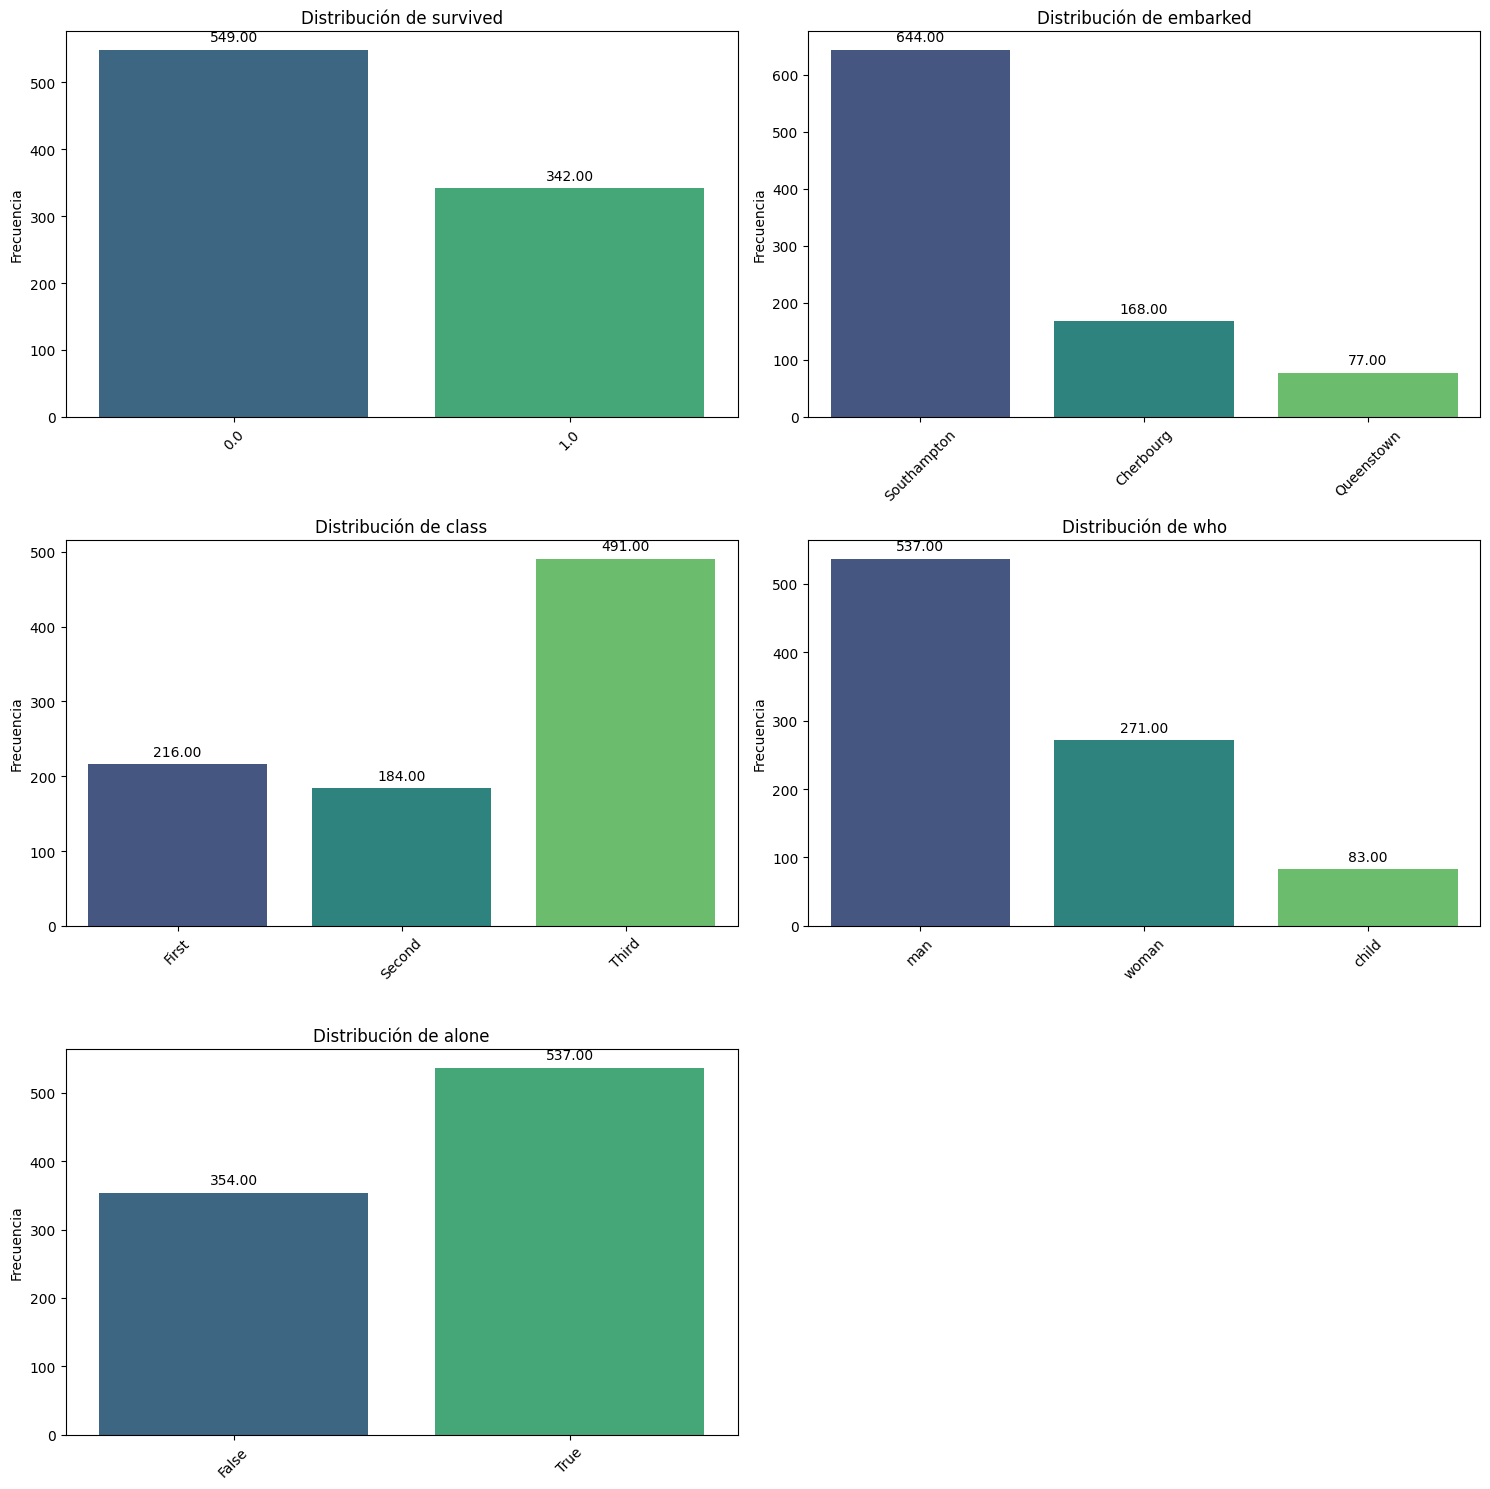

In [117]:
pinta_distribucion_categoricas(df,cat_lista_filtrada,mostrar_valores=True)

In [118]:
#Parece que en la frecuencia absoluta coincidimos con el perfil típico que dibujamos
#parece a simple vista que hay relacion entre who, embarked y class

In [119]:
#frecuencia relativa

In [120]:
for cat in df_categoricas_filtrada:
    print(df[cat].value_counts()/len(df)*100)
    print("__________________\n")

survived
0.0    30.808081
1.0    19.191919
Name: count, dtype: float64
__________________

embarked
Southampton    36.139169
Cherbourg       9.427609
Queenstown      4.320988
Name: count, dtype: float64
__________________

class
Third     27.553311
First     12.121212
Second    10.325477
Name: count, dtype: float64
__________________

who
man      30.134680
woman    15.207632
child     4.657688
Name: count, dtype: float64
__________________

alone
True     30.13468
False    19.86532
Name: count, dtype: float64
__________________



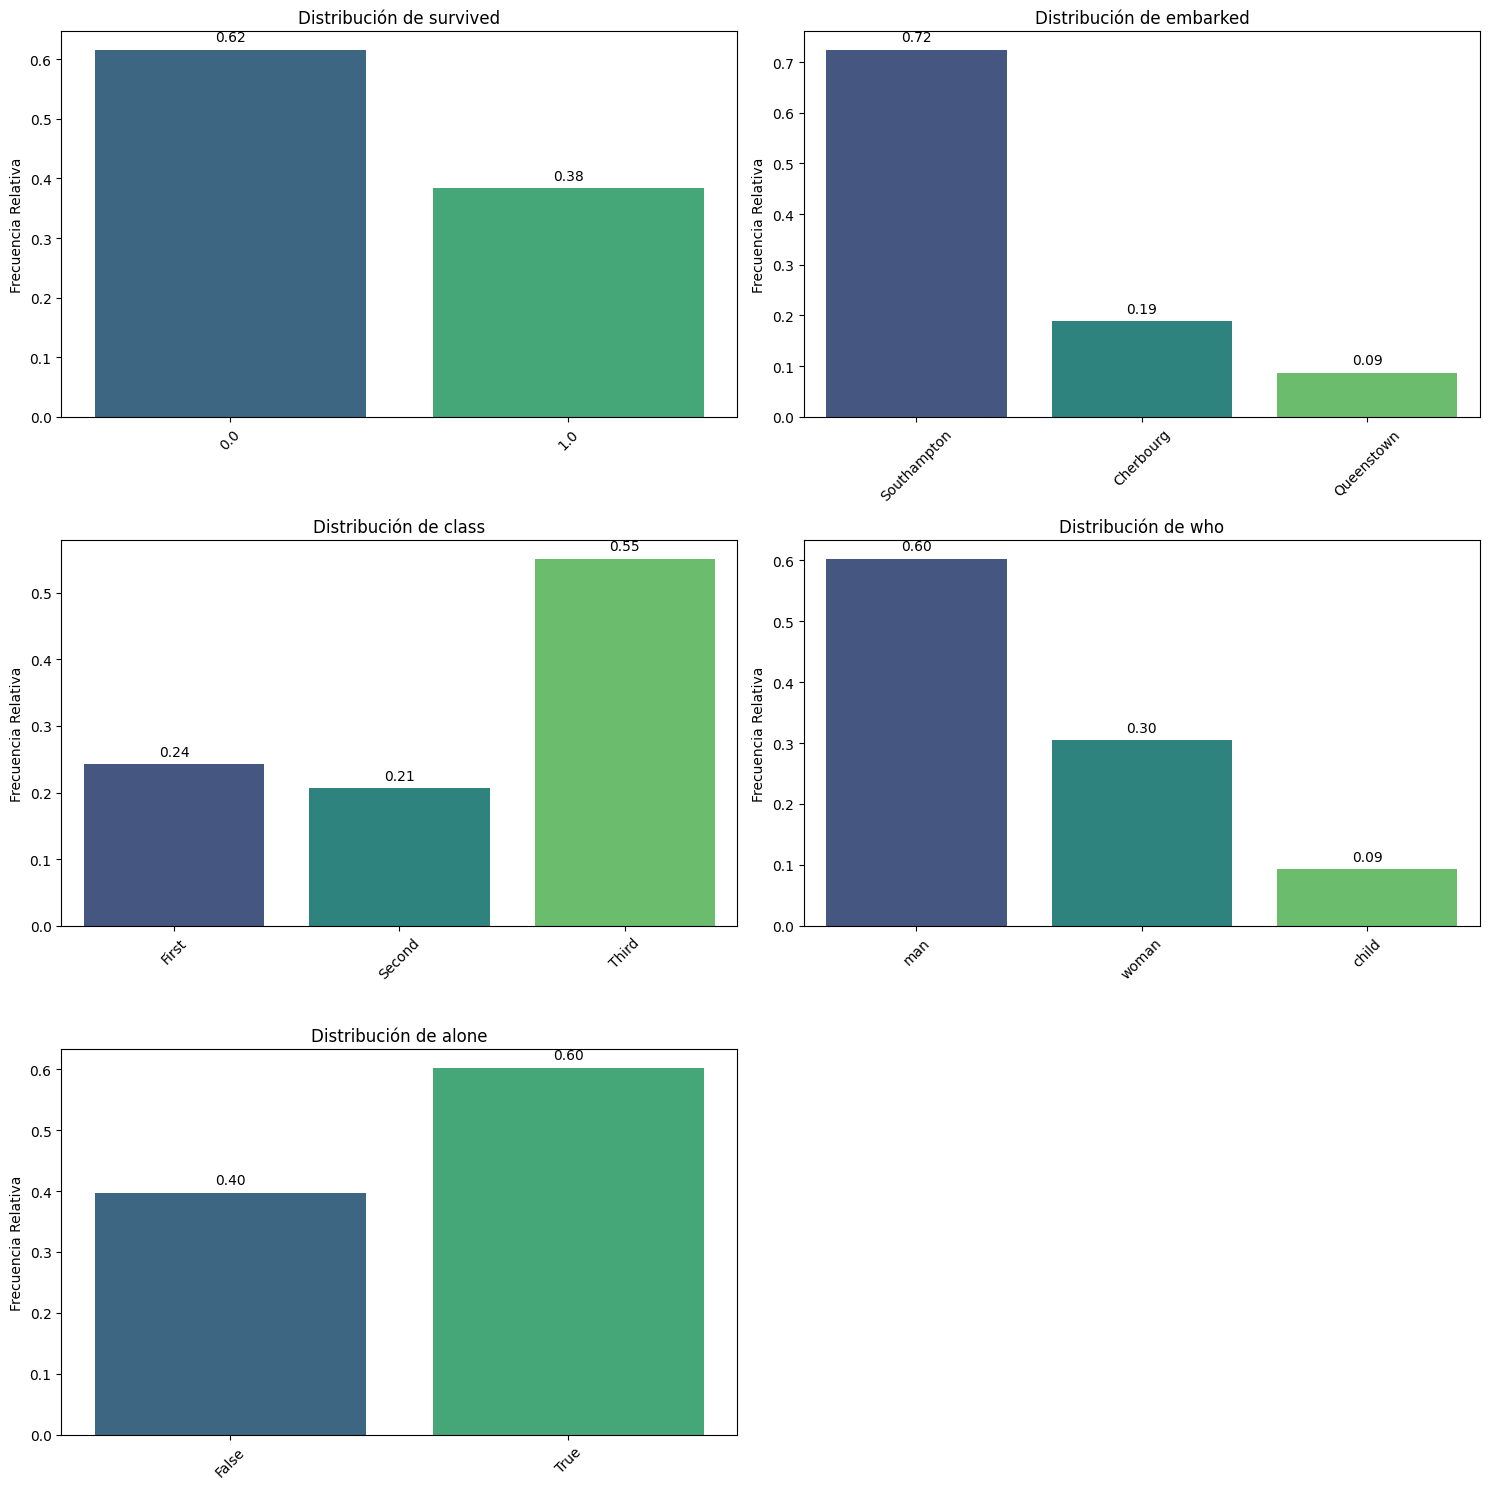

In [121]:
pinta_distribucion_categoricas(df,cat_lista_filtrada,relativa=True,mostrar_valores=True)

In [122]:
#un poco lo mismo que las absolutas

In [123]:
#Medidas posicionales

In [124]:
df_numericas_filtrada.describe().loc[["50%","75%","max"]].T #percentil 50%,75% y max
#aqui nos faltaria el percentil 0.9 del workout

,50%,75%,max
age,28.0000,38.0,80.0000
fare,14.4542,31.0,512.3292


In [125]:
df_numericas_filtrada.quantile(0.9).T #percentil 90%

age     50.0000
fare    77.9583
Name: 0.9, dtype: float64

In [126]:
#Rango intercuartílico (Comparamos mediana y extremos)
def get_IQR(df,col):
    return df[col].quantile(0.75) - df[col].quantile(0.25)

In [127]:
get_IQR(df,["age","fare"])

age     17.8750
fare    23.0896
dtype: float64

In [128]:
df[num_lista_filtrada].describe().loc["50%"]

age     28.0000
fare    14.4542
Name: 50%, dtype: float64

In [129]:
#los datos son lejanos entre sí, hay dispersión, sobre todo en fare, pero teneoms que ver el boxplot

<Axes: >

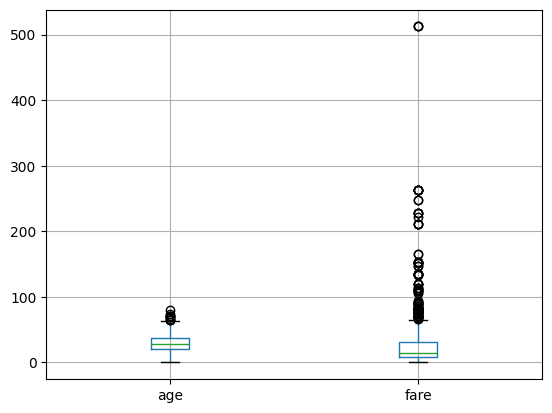

In [130]:
df[num_lista_filtrada].boxplot()
#en fare hay muchos outliers y no tiene sentido, ¿tanto cambia el precio del billete?)

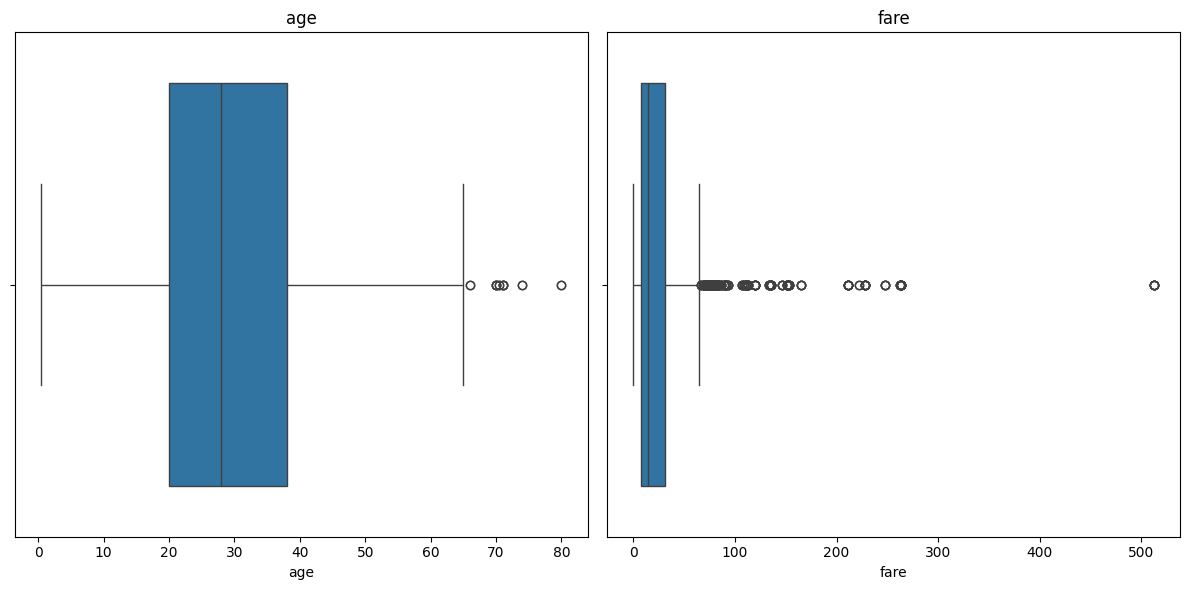

In [131]:
#he añadido a las funciones una que vimos en el workout y no está (def plot_multiple_boxplots)
plot_multiple_boxplots(df,num_lista_filtrada)
#aqui podemos ver en las cajas que fare está mas concentrado pero tiene muchos outliers
#en age hay mas dispersion porque los bigotes y la caja son mas largos, pero no hay tantos outliers

In [132]:
#Rango de valores
df_numericas_filtrada.describe().loc["max"] - df_numericas_filtrada.describe().loc["min"]
#la diferencia etre el valor max y minimo es grande, sobre todo en fare

age      79.5800
fare    512.3292
dtype: float64

In [133]:
#Medidas de dispersión más profundas

In [134]:
df_numericas_filtrada.describe().loc[["mean","std"]].T

,mean,std
age,29.699118,14.526497
fare,32.204208,49.693429


In [135]:
def variabilidad(df):
    var = df.describe().loc[["mean","std"]].T
    var["CV"]= (var["std"]/var["mean"])*100
    return var
variabilidad(df_numericas_filtrada)

,mean,std,CV
age,29.699118,14.526497,48.912219
fare,32.204208,49.693429,154.307253


In [136]:
#el resultado del coeficiente de variabilidad es alto, más del 30%, confirmando la dispersión de los datos
#tendremos que analizar maás profundamente y analizar los datos

In [137]:
#distribución

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fare'}>]], dtype=object)

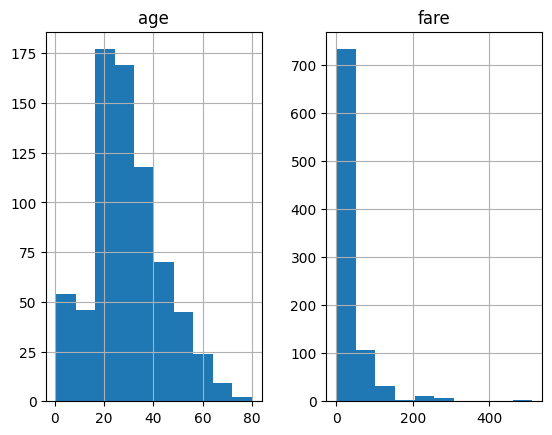

In [138]:
df_numericas_filtrada.hist()

In [139]:
#age tiene los datos más concentrados
#en fare podemos ver una alta concentración de los datos en un punto de la gráfica pero también una larga cola
#deberíamos analizar la variable filtrando extremos o haciendo binning

In [140]:
#Densidad de probabilidad

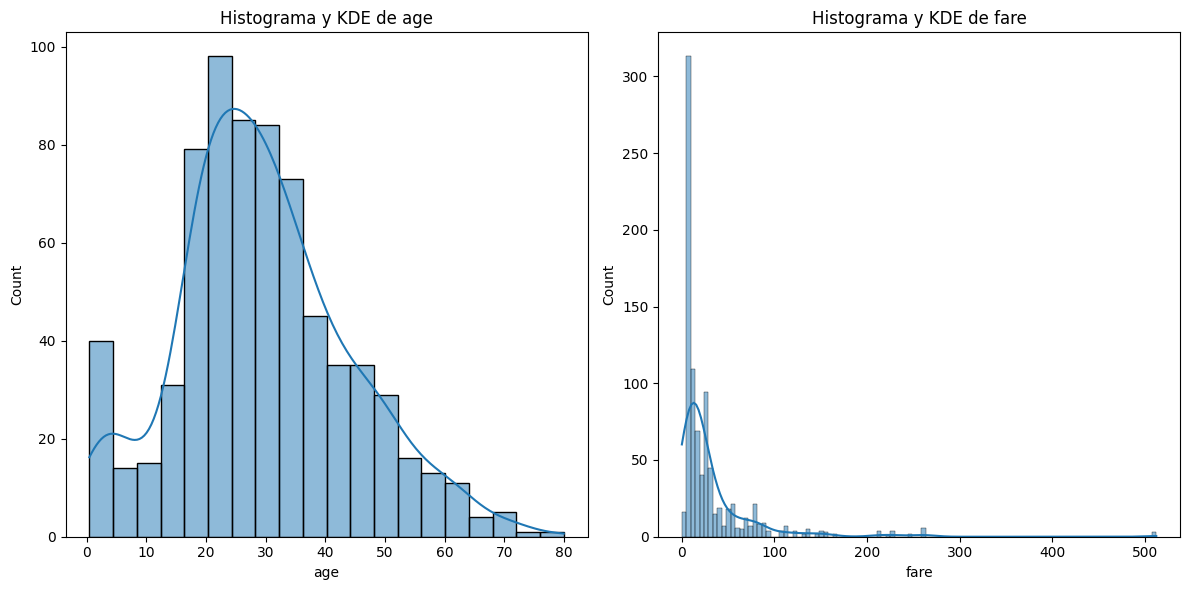

In [148]:
#HE añadido también al archivo de las funciones la sigiuente porque no estaba y era necesaria para el análisis:
plot_histo_dens(df_numericas_filtrada,["age","fare"])

In [ ]:
#aquí se confirma lal arga cola de fare, que habria que analizar, se parece a un grafioc normal
#age parece gaussiana, 
#ambas parecen distribuciones continuas, que rpesentan un numero infinito de posibles soluciones
#no parece haber simetría, solo en cierto punto
#como parecen normales o gaussianas, habrá que analizar los outliers combinando el histograma y boxplot

In [149]:
#Outliers o anomalías

(2, 2)


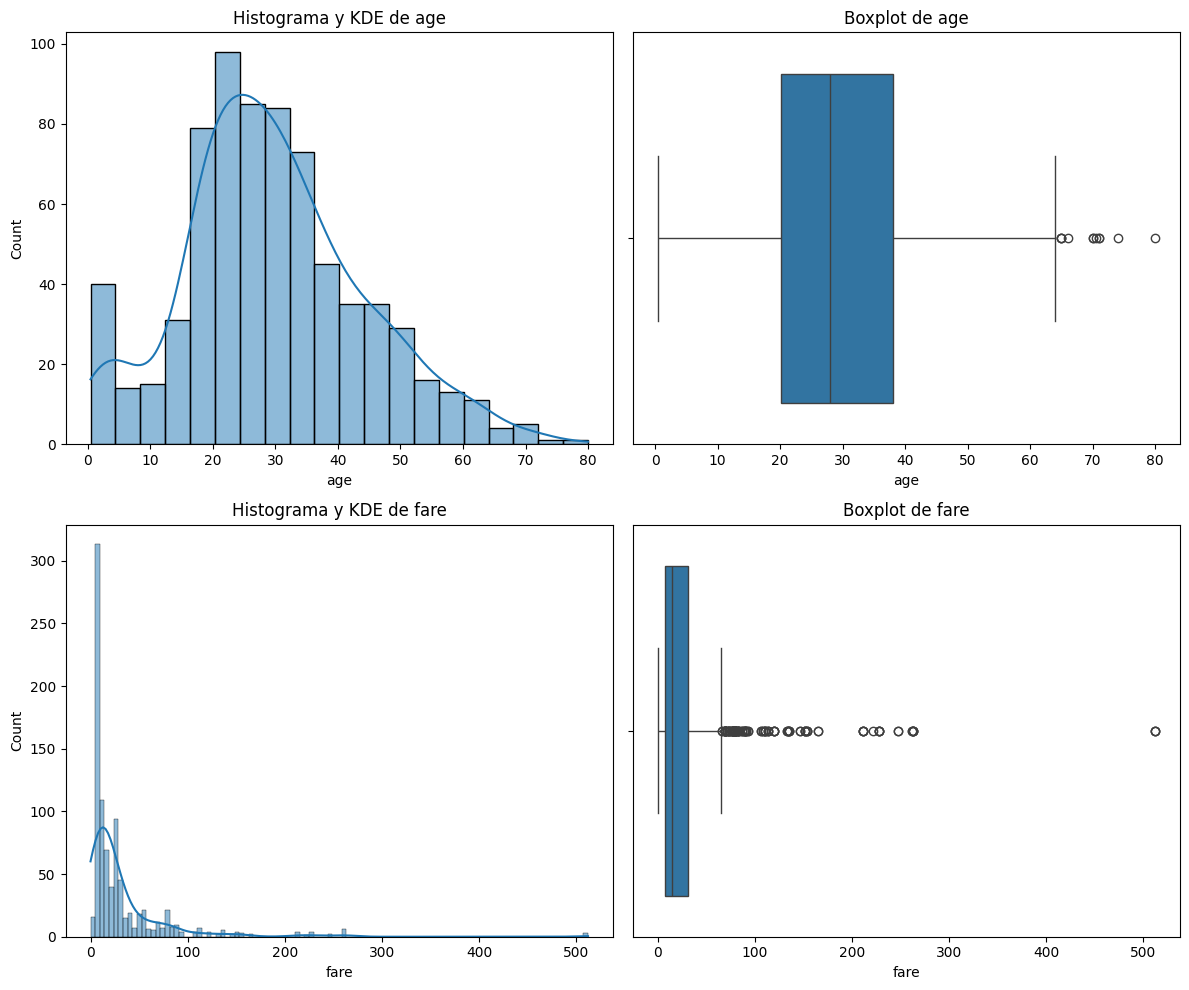

In [152]:
plot_combined_graphs(df_numericas_filtrada,["age","fare"])

In [ ]:
#si es gaussiana, como age, habría que ver si los valores superan dos o tres veces la desviación estandar en comparacion con la media
#si no es gaussiana, se coge la longitud de los bigote del boxplot (por encima de minimum y maximum serán outliers)

(2,)


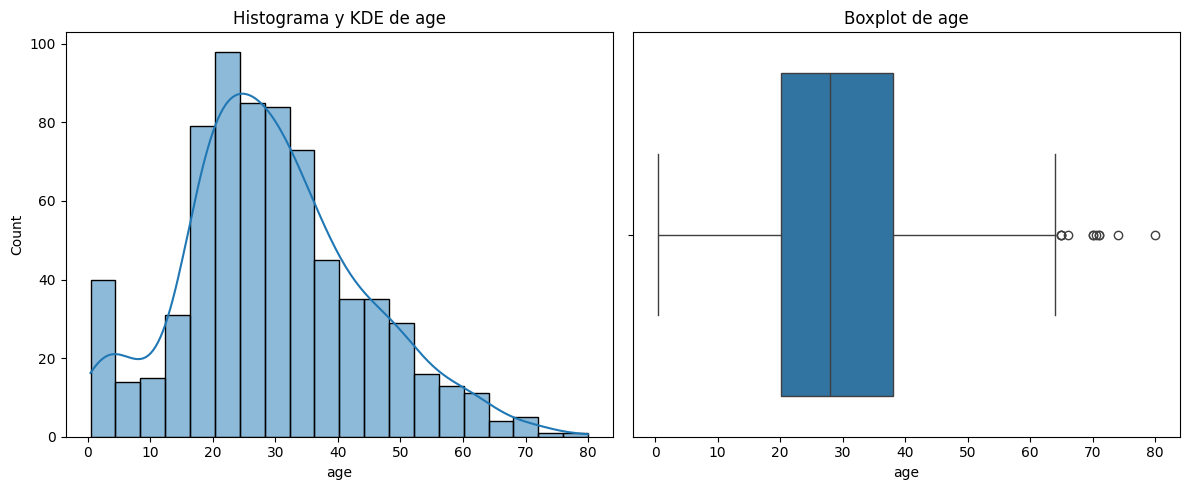

In [153]:
#GAUSSIANA
plot_combined_graphs(df_numericas_filtrada,["age"])

(2,)


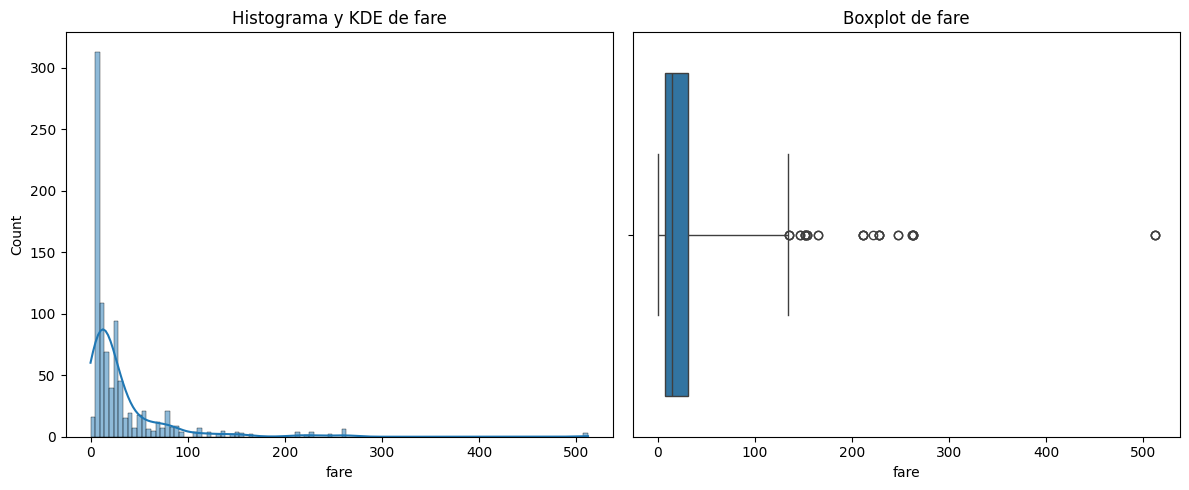

In [ ]:
#NO GAUSSIANA
plot_combined_graphs(df_numericas_filtrada,["fare"],whisker_width=4.5) #que es 3 veces la longitud habitual, a ojo

In [155]:
#Habría que preguntar a negocio sobre el resultado de nuestro análisis para poder decidir el tratamiento de outliers